In [1]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import numpy.ma as ma

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import xarray as xar

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
file_path='./data/sanjioil.nc'

In [6]:
ds=nc.Dataset(file_path)

In [7]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    standard_name_vocabulary: CF-1.6
    featureType: trajectory
    history: Created 2019-08-01 11:42:45.072000
    source: Output from simulation with OpenDrift
    model_url: https://github.com/OpenDrift/opendrift
    opendrift_class: OpenOil
    opendrift_module: opendrift.models.openoil
    readers: ['E:\\project\\oilspill_rescue\\curr_wind\\curr0_test.nc', 'E:\\project\\oilspill_rescue\\curr_wind\\wind0_test.nc', 'basemap_landmask']
    time_coverage_start: 2018-01-14 22:20:00
    time_step_calculation: 0:30:00
    time_step_output: 1:00:00
    config_seed:oil_type: MEDIUM (brage)
    config_seed:ocean_only: True
    config_general:use_basemap_landmask: True
    config_general:basemap_resolution: h
    config_general:coastline_action: stranding
    config_general:time_step_minutes: 60
    config_general:time_step_output_minutes: None
    config_drift:max_age_seconds: None

In [8]:
ds_xr=xar.open_dataset(file_path)

In [9]:
ds_xr

<xarray.Dataset>
Dimensions:                                   (time: 73, trajectory: 2958)
Coordinates:
  * trajectory                                (trajectory) int32 1 2 ... 2958
  * time                                      (time) datetime64[ns] 2018-01-14T22:20:00 ... 2018-01-17T22:20:00
    lon                                       (trajectory, time) float32 ...
    lat                                       (trajectory, time) float32 ...
Data variables:
    age_seconds                               (trajectory, time) float32 ...
    interfacial_area                          (trajectory, time) float32 ...
    mass_evaporated                           (trajectory, time) float32 ...
    water_fraction                            (trajectory, time) float32 ...
    y_wind                                    (trajectory, time) float32 ...
    sea_ice_area_fraction                     (trajectory, time) float32 ...
    density                                   (trajectory, time) float32 ...
    oil_film_thickness                        (trajectory, time) float32 ...
    x_sea_water_velocity                      (trajectory, time) float32 ...
    bulltime                                  (trajectory, time) float32 ...
    x_wind                                    (trajectory, time) float32 ...
    age_emulsion_seconds                      (trajectory, time) float32 ...
    sea_surface_wave_stokes_drift_y_velocity  (trajectory, time) float32 ...
    status                                    (trajectory, time) int32 ...
    viscosity                                 (trajectory, time) float32 ...
    sea_floor_depth_below_sea_level           (trajectory, time) float32 ...
    mass_dispersed                            (trajectory, time) float32 ...
    land_binary_mask                          (trajectory, time) float32 ...
    sea_surface_wave_significant_height       (trajectory, time) float32 ...
    sea_water_temperature                     (trajectory, time) float32 ...
    mass_oil                                  (trajectory, time) float32 ...
    age_exposure_seconds                      (trajectory, time) float32 ...
    sea_surface_wave_stokes_drift_x_velocity  (trajectory, time) float32 ...
    y_sea_water_velocity                      (trajectory, time) float32 ...
    z                                         (trajectory, time) float32 ...
    wind_drift_factor                         (trajectory, time) float32 ...
    fraction_evaporated                       (trajectory, time) float32 ...
Attributes:
    Conventions:                                  CF-1.6
    standard_name_vocabulary:                     CF-1.6
    featureType:                                  trajectory
    history:                                      Created 2019-08-01 11:42:45...
    source:                                       Output from simulation with...
    model_url:                                    https://github.com/OpenDrif...
    opendrift_class:                              OpenOil
    opendrift_module:                             opendrift.models.openoil
    readers:                                      ['E:\\project\\oilspill_res...
    time_coverage_start:                          2018-01-14 22:20:00
    time_step_calculation:                        0:30:00
    time_step_output:                             1:00:00
    config_seed:oil_type:                         MEDIUM (brage)
    config_seed:ocean_only:                       True
    config_general:use_basemap_landmask:          True
    config_general:basemap_resolution:            h
    config_general:coastline_action:              stranding
    config_general:time_step_minutes:             60
    config_general:time_step_output_minutes:      None
    config_drift:max_age_seconds:                 None
    config_drift:scheme:                          runge-kutta
    config_drift:stokes_drift:                    True
    config_drift:current_uncertainty:             0.5
    con

In [8]:
ds_xr.dims

Frozen(SortedKeysDict({'trajectory': 2958, 'time': 73}))

In [9]:
ds_xr.coords

Coordinates:
  * trajectory  (trajectory) int32 1 2 3 4 5 6 ... 2953 2954 2955 2956 2957 2958
  * time        (time) datetime64[ns] 2018-01-14T22:20:00 ... 2018-01-17T22:20:00
    lon         (trajectory, time) float32 ...
    lat         (trajectory, time) float32 ...

In [10]:
ds_xr['mass_oil']

<xarray.DataArray 'mass_oil' (trajectory: 2958, time: 73)>
[215934 values with dtype=float32]
Coordinates:
  * trajectory  (trajectory) int32 1 2 3 4 5 6 ... 2953 2954 2955 2956 2957 2958
  * time        (time) datetime64[ns] 2018-01-14T22:20:00 ... 2018-01-17T22:20:00
    lon         (trajectory, time) float32 ...
    lat         (trajectory, time) float32 ...
Attributes:
    units:    kg

In [11]:
ds_xr.attrs

{'Conventions': 'CF-1.6',
 'standard_name_vocabulary': 'CF-1.6',
 'featureType': 'trajectory',
 'history': 'Created 2019-08-01 11:42:45.072000',
 'source': 'Output from simulation with OpenDrift',
 'model_url': 'https://github.com/OpenDrift/opendrift',
 'opendrift_class': 'OpenOil',
 'opendrift_module': 'opendrift.models.openoil',
 'readers': "['E:\\\\project\\\\oilspill_rescue\\\\curr_wind\\\\curr0_test.nc', 'E:\\\\project\\\\oilspill_rescue\\\\curr_wind\\\\wind0_test.nc', 'basemap_landmask']",
 'time_coverage_start': '2018-01-14 22:20:00',
 'time_step_calculation': '0:30:00',
 'time_step_output': '1:00:00',
 'config_seed:oil_type': 'MEDIUM (brage)',
 'config_seed:ocean_only': 'True',
 'config_general:use_basemap_landmask': 'True',
 'config_general:basemap_resolution': 'h',
 'config_general:coastline_action': 'stranding',
 'config_general:time_step_minutes': 60,
 'config_general:time_step_output_minutes': 'None',
 'config_drift:max_age_seconds': 'None',
 'config_drift:scheme': 'runge-

In [12]:
# 查看一下经纬度的相关数据信息
ds_xr.lat

<xarray.DataArray 'lat' (trajectory: 2958, time: 73)>
[215934 values with dtype=float32]
Coordinates:
  * trajectory  (trajectory) int32 1 2 3 4 5 6 ... 2953 2954 2955 2956 2957 2958
  * time        (time) datetime64[ns] 2018-01-14T22:20:00 ... 2018-01-17T22:20:00
    lon         (trajectory, time) float32 ...
    lat         (trajectory, time) float32 ...
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

In [13]:
ds_xr.lon

<xarray.DataArray 'lon' (trajectory: 2958, time: 73)>
[215934 values with dtype=float32]
Coordinates:
  * trajectory  (trajectory) int32 1 2 3 4 5 6 ... 2953 2954 2955 2956 2957 2958
  * time        (time) datetime64[ns] 2018-01-14T22:20:00 ... 2018-01-17T22:20:00
    lon         (trajectory, time) float32 ...
    lat         (trajectory, time) float32 ...
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

尝试使用数字索引

In [26]:
ds_xr[:2]

TypeError: iteration over a 0-d array

In [25]:
ds_xr.isel(time=0,trajectory=0).age_seconds

<xarray.DataArray 'age_seconds' ()>
array(1800., dtype=float32)
Coordinates:
    trajectory  int32 1
    time        datetime64[ns] 2018-01-14T22:20:00
    lon         float32 ...
    lat         float32 ...
Attributes:
    units:    s

In [27]:
ds_xr.isel(time=0,trajectory=0)

<xarray.Dataset>
Dimensions:                                   ()
Coordinates:
    trajectory                                int32 1
    time                                      datetime64[ns] 2018-01-14T22:20:00
    lon                                       float32 ...
    lat                                       float32 ...
Data variables:
    age_seconds                               float32 ...
    interfacial_area                          float32 ...
    mass_evaporated                           float32 ...
    water_fraction                            float32 ...
    y_wind                                    float32 ...
    sea_ice_area_fraction                     float32 ...
    density                                   float32 ...
    oil_film_thickness                        float32 ...
    x_sea_water_velocity                      float32 ...
    bulltime                                  float32 ...
    x_wind                                    float32 ...
    age_emulsion_seconds                      float32 ...
    sea_surface_wave_stokes_drift_y_velocity  float32 ...
    status                                    int32 ...
    viscosity                                 float32 ...
    sea_floor_depth_below_sea_level           float32 ...
    mass_dispersed                            float32 ...
    land_binary_mask                          float32 ...
    sea_surface_wave_significant_height       float32 ...
    sea_water_temperature                     float32 ...
    mass_oil                                  float32 ...
    age_exposure_seconds                      float32 ...
    sea_surface_wave_stokes_drift_x_velocity  float32 ...
    y_sea_water_velocity                      float32 ...
    z                                         float32 ...
    wind_drift_factor                         float32 ...
    fraction_evaporated                       float32 ...
Attributes:
    Conventions:                                  CF-1.6
    standard_name_vocabulary:                     CF-1.6
    featureType:                                  trajectory
    history:                                      Created 2019-08-01 11:42:45...
    source:                                       Output from simulation with...
    model_url:                                    https://github.com/OpenDrif...
    opendrift_class:                              OpenOil
    opendrift_module:                             opendrift.models.openoil
    readers:                                      ['E:\\project\\oilspill_res...
    time_coverage_start:                          2018-01-14 22:20:00
    time_step_calculation:                        0:30:00
    time_step_output:                             1:00:00
    config_seed:oil_type:                         MEDIUM (brage)
    config_seed:ocean_only:                       True
    config_general:use_basemap_landmask:          True
    config_general:basemap_resolution:            h
    config_general:coastline_action:              stranding
    config_general:time_step_minutes:             60
    config_general:time_step_output_minutes:      None
    config_drift:max_age_seconds:                 None
    config_drift:scheme:                          runge-kutta
    config_drift:stokes_drift:                    True
    config_drift:current_uncertainty:             0.5
    config_drift:current_uncertainty_uniform:     0.0
    config_drift:wind_uncertainty:                1
    config_drift:relative_wind:                   False
    config_drift:lift_to_seafloor:                True
    config_drift:deactivate_north_of:             None
    config_drift:deactivate_south_of:             None
    config_drift:deactivate_east_of:              None
    config_drift:deactivate_west_of:              None
    config_drift:use_tabularised_stokes_drift:    False
    config_drift:tabularised_stokes_drift_fetch:  25000
    config_processes:dispersion:                  True
    config_processes:evaporation:  

In [28]:
# 找到对应的 特征的值
ds_xr.isel(time=0,trajectory=0)['y_wind']

<xarray.DataArray 'y_wind' ()>
array(2.074203, dtype=float32)
Coordinates:
    trajectory  int32 1
    time        datetime64[ns] 2018-01-14T22:20:00
    lon         float32 ...
    lat         float32 ...

In [19]:
ds_xr.trajectory[0]

<xarray.DataArray 'trajectory' ()>
array(1)
Coordinates:
    trajectory  int32 1
Attributes:
    cf_role:  trajectory_id
    units:    1

In [ ]:
# 尝试使用where进行检索


In [31]:
ds_xr.isel(time=0)['y_wind'][0]['lat']

<xarray.DataArray 'lat' ()>
array(28.369371, dtype=float32)
Coordinates:
    trajectory  int32 1
    time        datetime64[ns] 2018-01-14T22:20:00
    lon         float32 ...
    lat         float32 28.369371
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

## 获取`mass_oil`的`DataArray`  
如下可知：
    `mass_oil`有2958个值，该物理量有两个维度，分别为`trajectory`,`time`

In [10]:
ds_xr['mass_oil']

<xarray.DataArray 'mass_oil' (trajectory: 2958, time: 73)>
[215934 values with dtype=float32]
Coordinates:
  * trajectory  (trajectory) int32 1 2 3 4 5 6 ... 2953 2954 2955 2956 2957 2958
  * time        (time) datetime64[ns] 2018-01-14T22:20:00 ... 2018-01-17T22:20:00
    lon         (trajectory, time) float32 ...
    lat         (trajectory, time) float32 ...
Attributes:
    units:    kg

### 1- 尝试将xarray转为series

In [11]:
ds_xr['mass_oil'].to_series()

trajectory  time               
1           2018-01-14 22:20:00    2.000000e+03
            2018-01-14 23:20:00    1.624608e+03
            2018-01-15 00:20:00    9.969210e+36
            2018-01-15 01:20:00    9.969210e+36
            2018-01-15 02:20:00    9.969210e+36
            2018-01-15 03:20:00    9.969210e+36
            2018-01-15 04:20:00    9.969210e+36
            2018-01-15 05:20:00    9.969210e+36
            2018-01-15 06:20:00    9.969210e+36
            2018-01-15 07:20:00    9.969210e+36
            2018-01-15 08:20:00    9.969210e+36
            2018-01-15 09:20:00    9.969210e+36
            2018-01-15 10:20:00    9.969210e+36
            2018-01-15 11:20:00    9.969210e+36
            2018-01-15 12:20:00    9.969210e+36
            2018-01-15 13:20:00    9.969210e+36
            2018-01-15 14:20:00    9.969210e+36
            2018-01-15 15:20:00    9.969210e+36
            2018-01-15 16:20:00    9.969210e+36
            2018-01-15 17:20:00    9.969210e+36
        

In [12]:
# 查看指定的val的长度
ds_xr.isel(time=0)['mass_oil'].sizes

Frozen({'trajectory': 2958})

### 2- 查看`mass_oil`的分布情况

In [21]:
ds_xr_massoil=ds_xr.isel(time=0)['mass_oil'].to_series()
ds_xr_massoil.head()

trajectory
1    2000.0
2    2000.0
3    2000.0
4    2000.0
5    2000.0
Name: mass_oil, dtype: float32

In [24]:
ds_xr_massoil.head().T

trajectory
1    2000.0
2    2000.0
3    2000.0
4    2000.0
5    2000.0
Name: mass_oil, dtype: float32

In [44]:
ds_xr_massoil.values[1000]

9.96921e+36

In [ ]:
ds_xr_massoil

#### 清洗掉nan

In [55]:
ds_xr_massoil.where(ds_xr_massoil<=2000).dropna()

trajectory
1     2000.0
2     2000.0
3     2000.0
4     2000.0
5     2000.0
6     2000.0
7     2000.0
8     2000.0
9     2000.0
10    2000.0
11    2000.0
12    2000.0
13    2000.0
14    2000.0
15    2000.0
16    2000.0
17    2000.0
18    2000.0
19    2000.0
20    2000.0
21    2000.0
Name: mass_oil, dtype: float32

In [56]:
#ds_xr_massoil.where(ds_xr_massoil>2000)

### 柱状图

(array([ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.]),
 array([1999.5, 1999.6, 1999.7, 1999.8, 1999.9, 2000. , 2000.1, 2000.2,
        2000.3, 2000.4, 2000.5], dtype=float32),
 <a list of 10 Patch objects>)

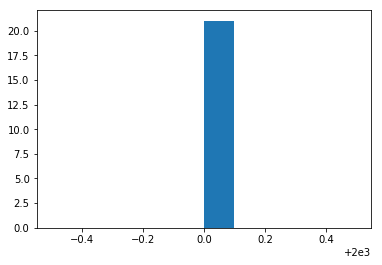

In [59]:
plt.hist(ds_xr_massoil.where(ds_xr_massoil<=2000).dropna())

### 折线图

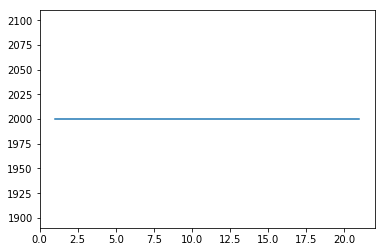

In [60]:
plt.plot(ds_xr_massoil.where(ds_xr_massoil<=2000).dropna())

In [61]:
#plt.hist()

(array([0., 0., 0., 0., 0., 5., 0., 0., 0., 0.]),
 array([1999.5, 1999.6, 1999.7, 1999.8, 1999.9, 2000. , 2000.1, 2000.2,
        2000.3, 2000.4, 2000.5], dtype=float32),
 <a list of 10 Patch objects>)

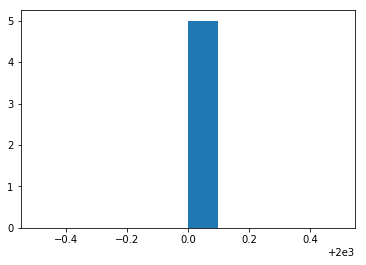

In [25]:
plt.hist(ds_xr_massoil.head().T)

#### 查看不同时刻的

In [67]:
ds_xr.isel(time=1)['mass_oil'].to_series().where(ds_xr.isel(time=1)['mass_oil'].to_series()<2000).dropna().head()

trajectory
1    1624.607544
2    1547.655151
3    1677.850220
4    1556.745605
5    1530.578369
Name: mass_oil, dtype: float32

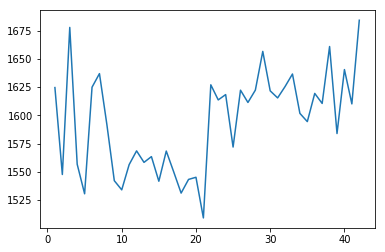

In [69]:
# 画个折线图看看
plt.plot(ds_xr.isel(time=1)['mass_oil'].to_series().where(ds_xr.isel(time=1)['mass_oil'].to_series()<2000).dropna())

(array([ 1.,  6.,  6.,  4.,  3.,  5., 10.,  3.,  2.,  2.]),
 array([1509.2178, 1526.717 , 1544.2162, 1561.7153, 1579.2146, 1596.7139,
        1614.213 , 1631.7122, 1649.2114, 1666.7107, 1684.2098],
       dtype=float32),
 <a list of 10 Patch objects>)

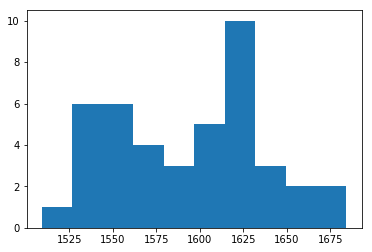

In [72]:
plt.hist(ds_xr.isel(time=1)['mass_oil'].to_series().where(ds_xr.isel(time=1)['mass_oil'].to_series()<2000).dropna())

# 此处存在一个问题  
对于指定`factor`的DataArray，全部都有值吗

In [39]:
ds_xr.isel(time=0)['mass_oil'][0]

<xarray.DataArray 'mass_oil' ()>
array(2000., dtype=float32)
Coordinates:
    trajectory  int32 1
    time        datetime64[ns] 2018-01-14T22:20:00
    lon         float32 ...
    lat         float32 ...
Attributes:
    units:    kg

In [41]:
ds_xr.isel(time=0)['mass_oil']

AttributeError: 'DataArray' object has no attribute 'array'

In [40]:
ds_xr.isel(time=0)['mass_oil'].max

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'mass_oil' (trajectory: 2958)>
array([2.00000e+03, 2.00000e+03, 2.00000e+03, ..., 9.96921e+36, 9.96921e+36,
       9.96921e+36], dtype=float32)
Coordinates:
  * trajectory  (trajectory) int32 1 2 3 4 5 6 ... 2953 2954 2955 2956 2957 2958
    time        datetime64[ns] 2018-01-14T22:20:00
    lon         (trajectory) float32 ...
    lat         (trajectory) float32 ...
Attributes:
    units:    kg>

---

In [6]:
ds.variables.keys()

dict_keys(['trajectory', 'time', 'age_seconds', 'interfacial_area', 'mass_evaporated', 'water_fraction', 'y_wind', 'sea_ice_area_fraction', 'density', 'lon', 'oil_film_thickness', 'x_sea_water_velocity', 'bulltime', 'x_wind', 'age_emulsion_seconds', 'sea_surface_wave_stokes_drift_y_velocity', 'status', 'viscosity', 'sea_floor_depth_below_sea_level', 'lat', 'mass_dispersed', 'land_binary_mask', 'sea_surface_wave_significant_height', 'sea_water_temperature', 'mass_oil', 'age_exposure_seconds', 'sea_surface_wave_stokes_drift_x_velocity', 'y_sea_water_velocity', 'z', 'wind_drift_factor', 'fraction_evaporated'])

注意使用[:]的方式返回的是视图，而非数组，注意！  
[参考](https://stackoverflow.com/questions/4370745/view-onto-a-numpy-array)

In [7]:
ds.variables['x_wind'][:]

masked_array(
  data=[[-5.44127893447876, -6.335221767425537, --, ..., --, --, --],
        [-6.289512634277344, -7.076473712921143, -4.9082512855529785,
         ..., -3.5429582595825195, -3.578788995742798,
         -3.1711130142211914],
        [-3.986665725708008, -5.01703405380249, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, -2.898705244064331],
        [--, --, --, ..., --, --, -3.9861390590667725],
        [--, --, --, ..., --, --, -1.0630155801773071]],
  mask=[[False, False,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False]],
  fill_value=9.96921e+36,
  dtype=float32)

[参考](https://stackoverflow.com/questions/4370745/view-onto-a-numpy-array)